<a href="https://colab.research.google.com/github/Glasiermedic/DataPrep/blob/master/Advanced%20Experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [0]:
country_rate = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")

In [3]:
country_rate.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
country_rate['cntry'].unique()


array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [0]:
cntrys = country_rate.cntry.unique().tolist()

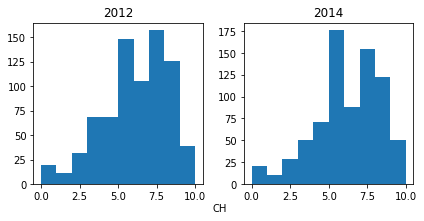

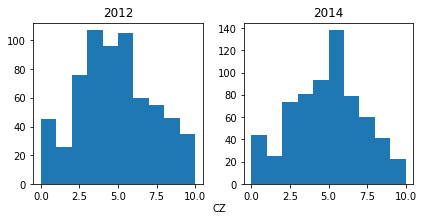

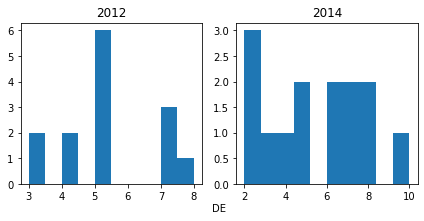

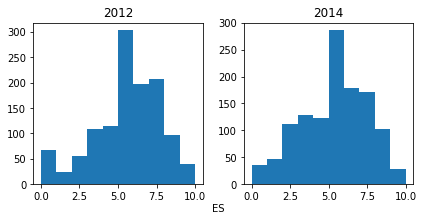

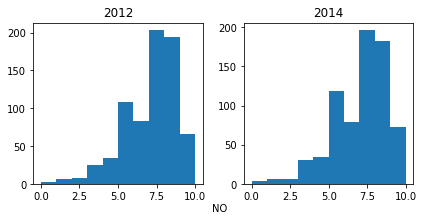

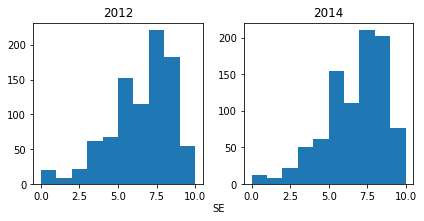

In [6]:
for country in cntrys:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==6)].dropna())
    axs[1].hist(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==7)].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()
    plt.show()


In [7]:
for country in cntrys:
  print ("-**-"*20)
  print (country)
  print ('2012 average trust: {}'.format(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==6)].mean()))
  print ('2014 average trust: {}'.format(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year'] == 7)].mean()))
  print (stats.ttest_rel(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==6)], 
                          country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==7)],
                          nan_policy='omit'
                         ))
  print("\n")
  
  if country == 'DE': 
    print('******   ******')
    print ("Based on the distributions Germany' data would be better suited for a non parametric (wilcox) test")
    print ('2012 median of trust: {}'.format(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==6)].mean()))
    print ('2014 median of trust: {}'.format(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year'] == 7)].mean()))
    print (stats.wilcoxon(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==6)], 
                          country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==7)],
                          zero_method = 'wilcox'
                         ))
    print("\n")


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
CH
2012 average trust: 5.677878395860285
2014 average trust: 5.751617076326003
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
CZ
2012 average trust: 4.362519201228879
2014 average trust: 4.424657534246576
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
DE
2012 average trust: 5.214285714285714
2014 average trust: 5.357142857142857
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)


******   ******
Based on the distributions Germany' data would be better suited for a non parametric (wilcox) test
2012 median of trust: 5.214285714285714
2014 median of trust: 5.357142857142857
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)


-**--**--**--**--**--**--**--**--**--

### Question 1: Did people become less trusting from 2012 to 2014?

####using our t-test and wilcox tests the signifigant diferences came from Spain, Sweden and Germany. Germany is unique in that it had a very large difference and trust increased.  Germany required the wilcox test while the rest used the standard t-test to get their results. 

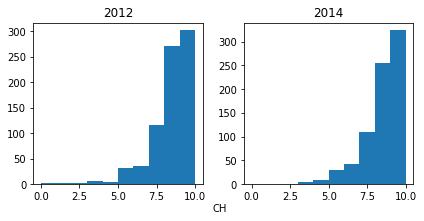

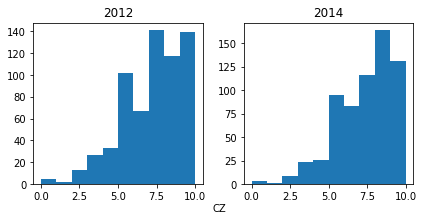

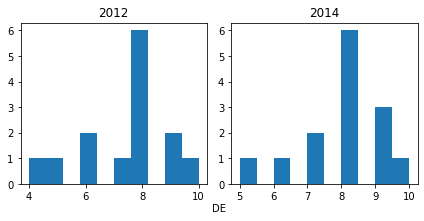

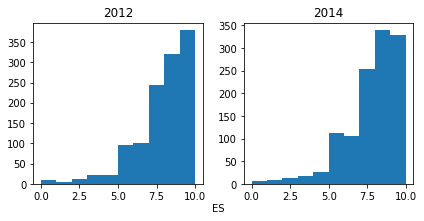

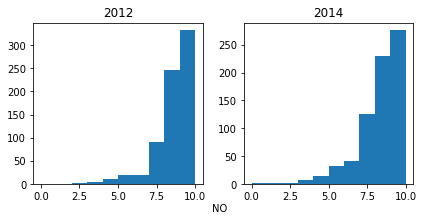

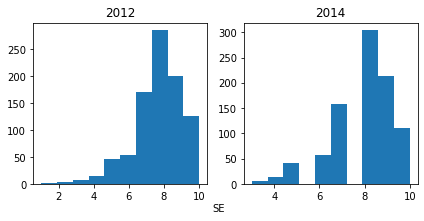

In [8]:
for country in cntrys:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(country_rate['happy'][(country_rate['cntry'] == country) & (country_rate['year']==6)].dropna())
    axs[1].hist(country_rate['happy'][(country_rate['cntry'] == country) & (country_rate['year']==7)].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()
    plt.show()


In [9]:
for country in cntrys:
  print ("-**-"*20)
  print (country)
  print ('2012 median of trust: {}'.format(country_rate['happy'][(country_rate['cntry'] == country) & (country_rate['year']==6)].mean()))
  print ('2014 median of trust: {}'.format(country_rate['happy'][(country_rate['cntry'] == country) & (country_rate['year'] == 7)].mean()))
  print (stats.wilcoxon(country_rate['happy'][(country_rate['cntry'] == country) & (country_rate['year']==6)], 
                          country_rate['happy'][(country_rate['cntry'] == country) & (country_rate['year']==7)],
                          zero_method = 'wilcox'
                         ))
  print("\n")

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
CH
2012 median of trust: 8.088311688311688
2014 median of trust: 8.116429495472186
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
CZ
2012 median of trust: 6.7708978328173375
2014 median of trust: 6.914110429447852
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
DE
2012 median of trust: 7.428571428571429
2014 median of trust: 7.857142857142857
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
ES
2012 median of trust: 7.548679867986799
2014 median of trust: 7.41996699669967
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
NO
2012 medi

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2882: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2883: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [10]:
for country in cntrys:
  print ("-**-"*20)
  print (country)
  print ('2012 average trust: {}'.format(country_rate['happy'][(country_rate['cntry'] == country) & (country_rate['year']==6)].mean()))
  print ('2014 average trust: {}'.format(country_rate['happy'][(country_rate['cntry'] == country) & (country_rate['year'] == 7)].mean()))
  print (stats.ttest_rel(country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==6)], 
                          country_rate['ppltrst'][(country_rate['cntry'] == country) & (country_rate['year']==7)],
                          nan_policy='omit'
                         ))
  print("\n")

-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
CH
2012 average trust: 8.088311688311688
2014 average trust: 8.116429495472186
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
CZ
2012 average trust: 6.7708978328173375
2014 average trust: 6.914110429447852
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
DE
2012 average trust: 7.428571428571429
2014 average trust: 7.857142857142857
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**--**-
ES
2012 average trust: 7.548679867986799
2014 average trust: 7.41996699669967
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320284)


-**--**--**--**--**--**--**--**--**--**--**--**--**--**

### Did people become happier from 2012 to 2014? 

#### Based on the parametric and non parametric tests there is a difference between 2012 and 2014 for happiness in the Czech Republic and Spain, the rest of the countries results were too similar to use. 

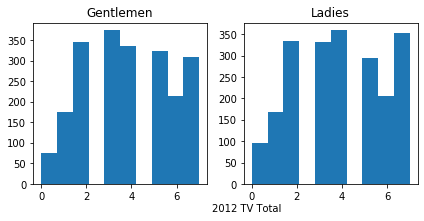

In [11]:
gentlemen = country_rate['tvtot'][(country_rate['gndr'] == 1.0) & (country_rate['year'] == 6)]
ladies = country_rate['tvtot'][(country_rate['gndr'] == 2.0) & (country_rate['year'] == 6)]

fig, axs = plt.subplots(1,2, figsize = (6,3))
axs[0].hist(gentlemen.dropna())
axs[1].hist(ladies.dropna())
fig.text(0.5, 0, '2012 TV Total')
axs[0].set_title('Gentlemen')
axs[1].set_title('Ladies')

plt.tight_layout()
plt.show()

In [12]:
print('Gentlemen mean: {}'.format(gentlemen.mean()))
print('Ladies mean: {}'.format(ladies.mean()))  
print(stats.ttest_ind(gentlemen, 
                    ladies,
                    nan_policy ='omit'
                    ))

Gentlemen mean: 3.901906090190609
Ladies mean: 3.944392523364486
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


### Who reported watching more TV in 2012, men or women?

#### There was no signifigant difference in 2012 between men and women watching more TV.  Our p-value also is telling us that it is likely that our sampling was not sufficient to provide reliable results in this area. 

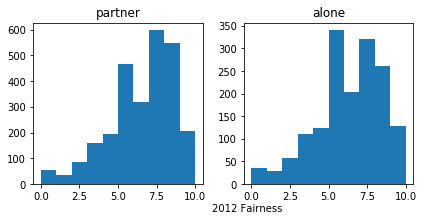

In [13]:
partner = country_rate['pplfair'][(country_rate['partner'] == 1.0) & (country_rate['year'] == 6)]
alone = country_rate['pplfair'][(country_rate['partner'] == 2.0) & (country_rate['year'] == 6)]

fig, axs = plt.subplots(1,2, figsize = (6,3))
axs[0].hist(partner.dropna())
axs[1].hist(alone.dropna())
fig.text(0.5, 0, '2012 Fairness')
axs[0].set_title('partner')
axs[1].set_title('alone')

plt.tight_layout()
plt.show()

In [16]:
print('Average fairness if living with partner: {}'.format(partner.mean()))
print('Average fairness if lining alone: {}'.format(alone.mean()))
print(stats.ttest_ind(partner, alone, nan_policy = 'omit'))

Average fairness if living with partner: 6.080736012016523
Average fairness if lining alone: 5.856965174129353
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)


### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

#### The data indicates living with a partner in 2012 made individuals rate the fairness of others slightly higher

In [17]:
social = cntrys[:4]
print(social)

['CH', 'CZ', 'DE', 'ES']


In [0]:
ch_meet = country_rate['sclmeet'][(country_rate['cntry'] == 'CH') & (country_rate['year'] ==7)].dropna()
cz_meet = country_rate['sclmeet'][(country_rate['cntry'] == 'CZ') & (country_rate['year'] ==7)].dropna()
de_meet = country_rate['sclmeet'][(country_rate['cntry'] == 'DE') & (country_rate['year'] ==7)].dropna()
es_meet = country_rate['sclmeet'][(country_rate['cntry'] == 'ES') & (country_rate['year'] ==7)].dropna()

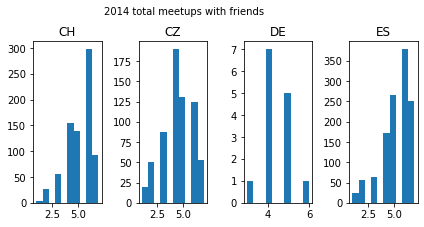

In [19]:
fig, axs = plt.subplots(1,4, figsize = (6,3))

axs[0].hist(ch_meet)
axs[1].hist(cz_meet)
axs[2].hist(de_meet)
axs[3].hist(es_meet)

fig.text(0.25, 1, '2014 total meetups with friends')

axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('DE')
axs[3].set_title('ES')
plt.tight_layout()
plt.show()


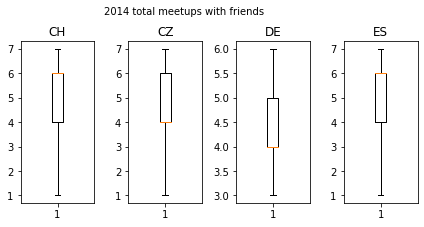

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(6, 3))

axs[0].boxplot(ch_meet)
axs[1].boxplot(cz_meet)
axs[2].boxplot(de_meet)
axs[3].boxplot(es_meet)

fig.text(0.25, 1, '2014 total meetups with friends')
axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('DE')
axs[3].set_title('ES')
plt.tight_layout()
plt.show()

In [21]:

F, p = stats.f_oneway(ch_meet, cz_meet, de_meet, es_meet)
print('F statistic:', F, '\np-value:', p)

F statistic: 50.269684739366305 
p-value: 1.357986438585725e-31


In [22]:
print('Average number of meetups with friends for CH: {} ({} total meetups)'.format(ch_meet.mean(),ch_meet.count()))
print('Average number of meetups with friends for CZ: {} ({} total meetups)'.format(cz_meet.mean(),cz_meet.count()))
print('Average number of meetups with friends for DE: {} ({} total meetups)'.format(de_meet.mean(),de_meet.count()))
print('Average number of meetups with friends for ES: {} ({} total meetups)'.format(es_meet.mean(),es_meet.count()))



    
    

Average number of meetups with friends for CH: 5.160621761658031 (772 total meetups)
Average number of meetups with friends for CZ: 4.445801526717557 (655 total meetups)
Average number of meetups with friends for DE: 4.428571428571429 (14 total meetups)
Average number of meetups with friends for ES: 5.2601156069364166 (1211 total meetups)


In [23]:
print('comparing CH and CZ:\n{}\n'.format(stats.ttest_ind(ch_meet,cz_meet)))
print('comparing CH and DE:\n{}\n'.format(stats.ttest_ind(ch_meet,de_meet)))
print('comparing CH and ES:\n{}\n'.format(stats.ttest_ind(ch_meet,es_meet)))
print('comparing CZ and DE:\n{}\n'.format(stats.ttest_ind(cz_meet,de_meet)))
print('comparing CZ and ES:\n{}\n'.format(stats.ttest_ind(cz_meet,es_meet)))
print('comparing DE and ES:\n{}\n'.format(stats.ttest_ind(de_meet,es_meet)))

comparing CH and CZ:
Ttest_indResult(statistic=9.675850699914886, pvalue=1.7204743885392493e-21)

comparing CH and DE:
Ttest_indResult(statistic=2.0861293215128325, pvalue=0.037289604714147245)

comparing CH and ES:
Ttest_indResult(statistic=-1.5343317353073618, pvalue=0.12510774525042745)

comparing CZ and DE:
Ttest_indResult(statistic=0.0433661445611368, pvalue=0.9654226437207307)

comparing CZ and ES:
Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)

comparing DE and ES:
Ttest_indResult(statistic=-2.115791799094089, pvalue=0.03456418756613026)



### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

#### The Anova test reveal with high reliability that there are signifigant differences between Germany, Sweden, Czech Rebuplic and China.  Upon closer evaluation we can see that the Czech Republic stands out as being very different from all but Germany.  The rest of the countries are signifigantly different from each other just not as much as the Czech Republic. 

In [0]:
ch_sclact = country_rate['sclact'][(country_rate['cntry'] == 'CH') & (country_rate['year'] ==7)].dropna()
cz_sclact = country_rate['sclact'][(country_rate['cntry'] == 'CZ') & (country_rate['year'] ==7)].dropna()
de_sclact = country_rate['sclact'][(country_rate['cntry'] == 'DE') & (country_rate['year'] ==7)].dropna()
es_sclact = country_rate['sclact'][(country_rate['cntry'] == 'ES') & (country_rate['year'] ==7)].dropna()

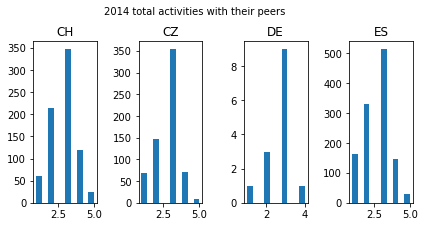

In [25]:
fig, axs = plt.subplots(1,4, figsize = (6,3))

axs[0].hist(ch_sclact)
axs[1].hist(cz_sclact)
axs[2].hist(de_sclact)
axs[3].hist(es_sclact)

fig.text(0.25, 1, '2014 total activities with their peers')

axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('DE')
axs[3].set_title('ES')
plt.tight_layout()
plt.show()


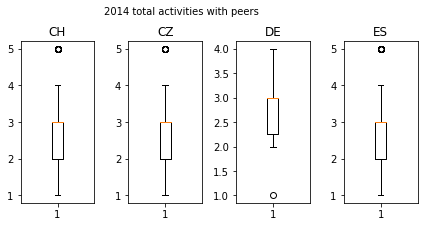

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(6, 3))

axs[0].boxplot(ch_sclact)
axs[1].boxplot(cz_sclact)
axs[2].boxplot(de_sclact)
axs[3].boxplot(es_sclact)

fig.text(0.25, 1, '2014 total activities with peers')
axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('DE')
axs[3].set_title('ES')
plt.tight_layout()
plt.show()

In [27]:

F, p = stats.f_oneway(ch_sclact, cz_sclact, de_sclact, es_sclact)
print('F statistic:', F, '\np-value:', p)

F statistic: 5.113009547330521 
p-value: 0.0015796094503818428


In [28]:
print('Average number of peer activities for CH: {} ({} total meetups)'.format(ch_sclact.mean(),ch_sclact.count()))
print('Average number of peer activities for CZ: {} ({} total meetups)'.format(cz_sclact.mean(),cz_sclact.count()))
print('Average number of peer activities for DE: {} ({} total meetups)'.format(de_sclact.mean(),de_sclact.count()))
print('Average number of peer activities for ES: {} ({} total meetups)'.format(es_sclact.mean(),es_sclact.count()))

Average number of peer activities for CH: 2.7816993464052286 (765 total meetups)
Average number of peer activities for CZ: 2.703076923076923 (650 total meetups)
Average number of peer activities for DE: 2.7142857142857144 (14 total meetups)
Average number of peer activities for ES: 2.6168776371308016 (1185 total meetups)


In [29]:
print('comparing CH and CZ:\n{}\n'.format(stats.ttest_ind(ch_sclact,cz_sclact)))
print('comparing CH and DE:\n{}\n'.format(stats.ttest_ind(ch_sclact,de_sclact)))
print('comparing CH and ES:\n{}\n'.format(stats.ttest_ind(ch_sclact,es_sclact)))
print('comparing CZ and DE:\n{}\n'.format(stats.ttest_ind(cz_sclact,de_sclact)))
print('comparing CZ and ES:\n{}\n'.format(stats.ttest_ind(cz_sclact,es_sclact)))
print('comparing DE and ES:\n{}\n'.format(stats.ttest_ind(de_sclact,es_sclact)))

comparing CH and CZ:
Ttest_indResult(statistic=1.665721791943212, pvalue=0.09599050025440872)

comparing CH and DE:
Ttest_indResult(statistic=0.2746903478421981, pvalue=0.7836271662948312)

comparing CH and ES:
Ttest_indResult(statistic=3.7901178679751157, pvalue=0.00015515309017284228)

comparing CZ and DE:
Ttest_indResult(statistic=-0.04890685579084129, pvalue=0.9610082764822516)

comparing CZ and ES:
Ttest_indResult(statistic=1.9231457887987455, pvalue=0.05461649785517343)

comparing DE and ES:
Ttest_indResult(statistic=0.3809408460233457, pvalue=0.7033147402370797)



### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others in their age, in 2014. Are there any differences? If so, which countries stand out?

#### Based on the Anova, two country comparisons,  and the graphical respresentation of each country's distribution there are differences between the countries. Compares to the social meetup variable social activities is  The complete t-tests also reveal that there are differences in social activies between almost all but the Czech Republic and Germany.  